## Big Data Analysis on San Francisco Crime Data

Shiyou Li

### Introduction: Business Problem
This project aims to perform **OLAP analysis** on the huge data of San Francisco Crime records from 2003 to 2018 with approach of Big Data Techniques

In this project we basically do some exportary analysis on the over 200 million crime data with a pattern of answering some important question 

### Data
https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry

About this data:
- Pdld: Unique Identifier for use in update and insert operations
- IncidntNum
- Incident Code
- Category: crime category
- Descript: null
- DayOfWeek
- Date
- Time
- PdDistrict: Historical PD District Effective Through 7-18-2015
- Resolution: How the incident is resoloved
- Address: crime address
- X: location coordinates X
- Y: location coordinates Y
- location

### Read Data From Website and Move to HDFS

In [0]:
import urllib.request
urllib.request.urlretrieve("https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD", "/tmp/myxxxx.csv")
dbutils.fs.mv("file:/tmp/myxxxx.csv", "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv")
display(dbutils.fs.ls('dbfs:/laioffer/spark_hw1/data/'))

### Import Packages

In [0]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

import os
os.environ["PYSPARK_PYTHON"] = "python3"

In [0]:
data_path = "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv"

### Get Saprk Dataframe and Spark SQL

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")


PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
4018830907041,040188309,07041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,02/15/2004,02:00,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.5,90,POINT (-120.50000000000001 90),null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
13605159706372,136051597,06372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,03/14/2013,09:21,SOUTHERN,NONE,1300 Block of STEVENSON ST,-122.421594519119,37.7707674171464,POINT (-122.421594519119 37.7707674171464),32,1,10,20,8,2,9,28853,19,null,null,null,null,null,null,2,null,null,null,null,32
13618826906244,136188269,06244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,10/08/2013,19:30,MISSION,NONE,VALENCIA ST / DUBOCE AV,-122.422367409563,37.7698682392455,POINT (-122.422367409563 37.7698682392455),null,3,5,20,8,4,5,28853,19,null,null,null,3,null,null,2,null,null,3,null,null
4098938926105,040989389,26105,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,08/29/2004,22:47,PARK,NONE,300 Block of WOODSIDE AV,-122.452716700987,37.7457451434135,POINT (-122.452716700987 37.7457451434135),49,7,8,38,1,5,4,59,38,null,null,null,null,null,null,1,null,null,null,null,49
5085058207021,050850582,07021,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,07/29/2005,21:00,INGLESIDE,NONE,0 Block of RAE AV,-122.448127287476,37.7121636146229,POINT (-122.448127287476 37.7121636146229),66,9,1,28,9,7,6,28861,25,null,null,null,null,null,null,2,null,null,null,null,66
13085582009320,130855820,09320,FRAUD,"CREDIT CARD, THEFT BY USE OF",Tuesday,10/08/2013,21:11,PARK,NONE,2600 Block of GEARY BL,-122.446612978839,37.7822458223917,POINT (-122.44661297883898 37.7822458223917),13,8,6,18,15,5,1,54,16,null,null,null,null,null,null,1,null,null,null,null,13
11091687865016,110916878,65016,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,11/13/2011,10:15,BAYVIEW,"ARREST, CITED",PHELPS ST / EVANS AV,-122.388456834121,37.7429830266541,POINT (-122.388456834121 37.7429830266541),86,2,9,1,10,3,8,58,1,null,null,null,null,null,null,1,null,null,null,null,86
5116515606241,051165156,06241,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Saturday,10/15/2005,13:00,RICHMOND,NONE,DIVISADERO ST / SUTTER ST,-122.439874051516,37.7852471617589,POINT (-122.439874051516 37.7852471617589),103,4,11,15,15,6,11,29490,13,null,null,null,null,null,null,2,null,null,null,null,103
5099200968020,050992009,68020,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Saturday,09/03/2005,21:21,TARAVAL,NONE,1500 Block of 12TH AV,-122.469264894685,37.7592163037102,POINT (-122.469264894685 37.7592163037102),109,10,8,14,1,8,4,56,12,null,null,null,null,null,null,1,null,null,null,null,109
9118446702004,091184467,02004,"SEX OFFENSES, FORCIBLE","FORCIBLE RAPE, BODILY FORCE",Monday,11/16/2009,12:49,TENDERLOIN,DISTRICT ATTORNEY REFUSES TO PROSECUTE,500 Block of JONES ST,-122.412999075009,37.786277459166,POINT (-122.412999075009 37.786277459166),20,5,10,36,5,10,9,28852,36,null,null,null,null,null,null,2,1,1,null,null,20


### Q1 question: 
counts the number of crimes for different category.

In [0]:
## Spark DataFrame
q1_result = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(q1_result)

category,count
LARCENY/THEFT,477975
OTHER OFFENSES,303027
NON-CRIMINAL,236937
ASSAULT,191384
VEHICLE THEFT,126228
DRUG/NARCOTIC,117875
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79740


In [0]:
#Spark SQL based
crimeCategory = sqlContext.sql("""
                              SELECT  category, COUNT(*) AS Count 
                              FROM sf_crime 
                              GROUP BY category 
                              ORDER BY Count DESC
                              """)
display(crimeCategory)

category,Count
LARCENY/THEFT,477975
OTHER OFFENSES,303027
NON-CRIMINAL,236937
ASSAULT,191384
VEHICLE THEFT,126228
DRUG/NARCOTIC,117875
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79740


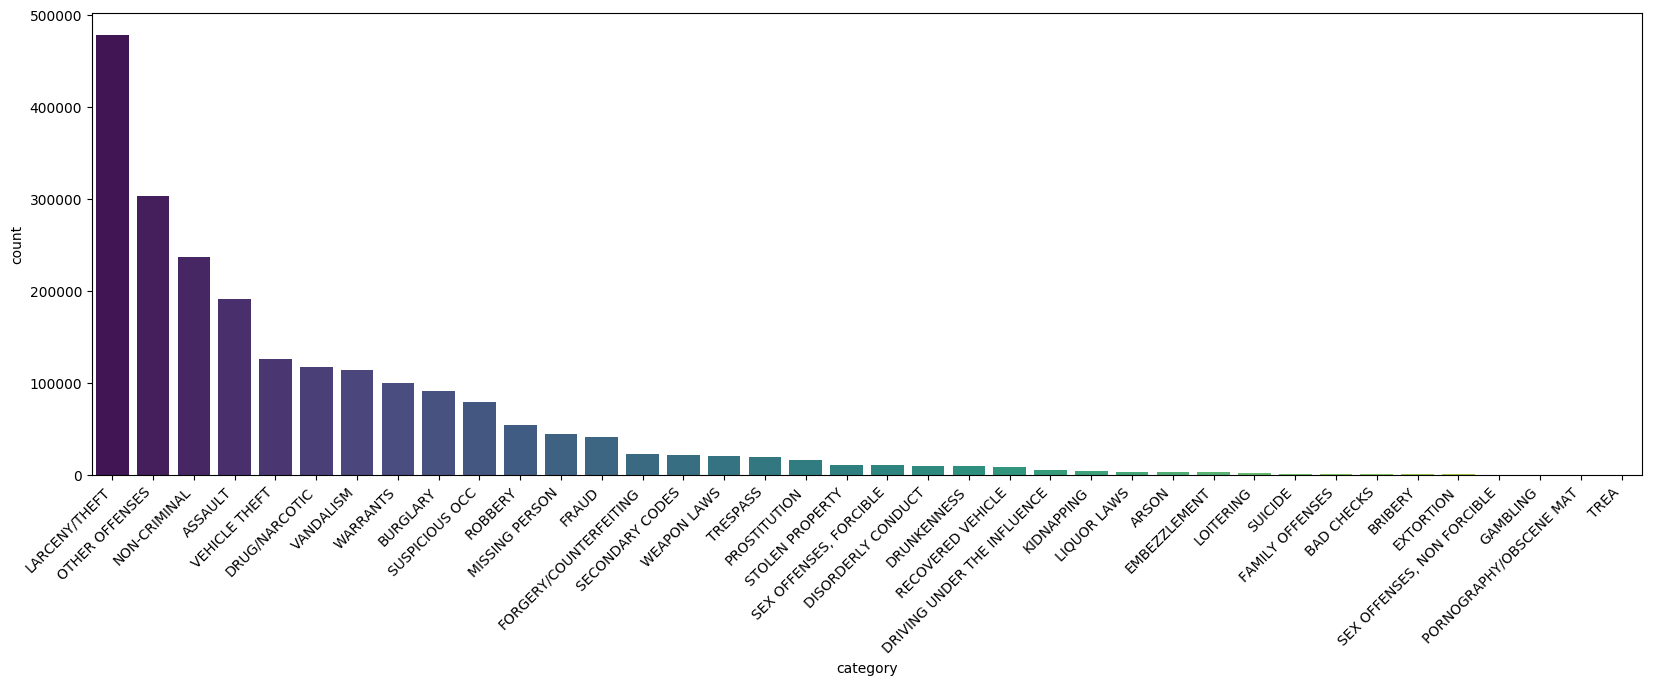

In [0]:
## visualiztion
fig_dims = (20,6)
fig = plt.subplots(figsize=fig_dims)
q1_plot = q1_result.toPandas()
chart = sb.barplot(x = 'category', y = 'count', palette='viridis',data = q1_plot )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
display()

#### Q2 question 
Counts the number of crimes for different district, and visualize your results

In [0]:
## spark df
df_q2_result = df_opt1.groupBy('PdDistrict').count().orderBy('Count', ascending=False)
display(df_q2_result)

PdDistrict,count
SOUTHERN,394234
MISSION,293072
NORTHERN,269229
CENTRAL,223962
BAYVIEW,210729
TENDERLOIN,189034
INGLESIDE,186645
TARAVAL,158710
PARK,121070
RICHMOND,114267


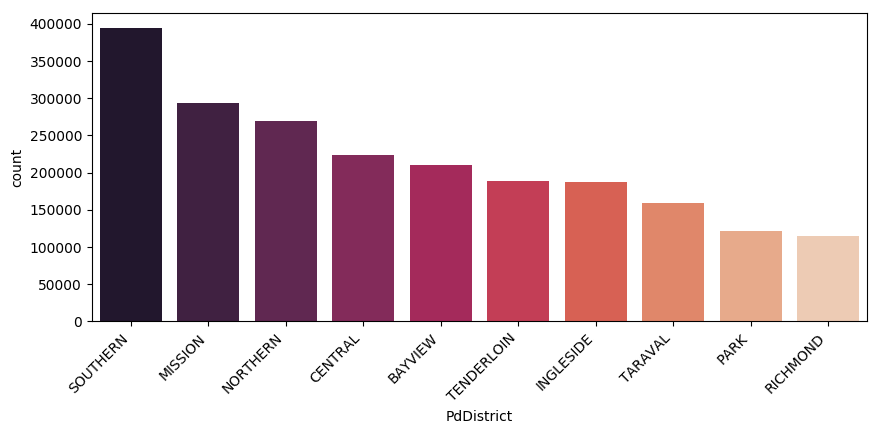

In [0]:
# Visualize Result
fig_dims = (10,4)
fig = plt.subplots(figsize=fig_dims)
q2_plot = df_q2_result.toPandas()
chart = sb.barplot(x = 'PdDistrict', y = 'count', palette= 'rocket',data = q2_plot )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
display()

#### Q3 question (OLAP)
Count the number of crimes each "Sunday" at "SF downtown"

In [0]:
df_opt2 = df_opt1[['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location']]
display(df_opt2)
df_opt2.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
040188309,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,02/15/2004,02:00,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.5,90,POINT (-120.50000000000001 90)
136051597,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,03/14/2013,09:21,SOUTHERN,NONE,1300 Block of STEVENSON ST,-122.421594519119,37.7707674171464,POINT (-122.421594519119 37.7707674171464)
136188269,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,10/08/2013,19:30,MISSION,NONE,VALENCIA ST / DUBOCE AV,-122.422367409563,37.7698682392455,POINT (-122.422367409563 37.7698682392455)
040989389,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,08/29/2004,22:47,PARK,NONE,300 Block of WOODSIDE AV,-122.452716700987,37.7457451434135,POINT (-122.452716700987 37.7457451434135)
050850582,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,07/29/2005,21:00,INGLESIDE,NONE,0 Block of RAE AV,-122.448127287476,37.7121636146229,POINT (-122.448127287476 37.7121636146229)
130855820,FRAUD,"CREDIT CARD, THEFT BY USE OF",Tuesday,10/08/2013,21:11,PARK,NONE,2600 Block of GEARY BL,-122.446612978839,37.7822458223917,POINT (-122.44661297883898 37.7822458223917)
110916878,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,11/13/2011,10:15,BAYVIEW,"ARREST, CITED",PHELPS ST / EVANS AV,-122.388456834121,37.7429830266541,POINT (-122.388456834121 37.7429830266541)
051165156,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Saturday,10/15/2005,13:00,RICHMOND,NONE,DIVISADERO ST / SUTTER ST,-122.439874051516,37.7852471617589,POINT (-122.439874051516 37.7852471617589)
050992009,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Saturday,09/03/2005,21:21,TARAVAL,NONE,1500 Block of 12TH AV,-122.469264894685,37.7592163037102,POINT (-122.469264894685 37.7592163037102)
091184467,"SEX OFFENSES, FORCIBLE","FORCIBLE RAPE, BODILY FORCE",Monday,11/16/2009,12:49,TENDERLOIN,DISTRICT ATTORNEY REFUSES TO PROSECUTE,500 Block of JONES ST,-122.412999075009,37.786277459166,POINT (-122.412999075009 37.786277459166)


In [0]:
from pyspark.sql.functions import hour, date_format, to_date, month, year
# convert Data column to Date type
df_new = df_opt2.withColumn("Date",to_date(df_opt2.Date, "MM/dd/yyyy")) 
# extract month and year from incident date
df_new = df_new.withColumn('Month',month(df_new['Date']))
df_new = df_new.withColumn('Year', year(df_new['Date']))
display(df_new.take(5))

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Month,Year
040188309,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,2004-02-15,02:00,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.5,90,POINT (-120.50000000000001 90),2,2004
136051597,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,2013-03-14,09:21,SOUTHERN,NONE,1300 Block of STEVENSON ST,-122.421594519119,37.7707674171464,POINT (-122.421594519119 37.7707674171464),3,2013
136188269,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,2013-10-08,19:30,MISSION,NONE,VALENCIA ST / DUBOCE AV,-122.422367409563,37.7698682392455,POINT (-122.422367409563 37.7698682392455),10,2013
040989389,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,2004-08-29,22:47,PARK,NONE,300 Block of WOODSIDE AV,-122.452716700987,37.7457451434135,POINT (-122.452716700987 37.7457451434135),8,2004
050850582,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,2005-07-29,21:00,INGLESIDE,NONE,0 Block of RAE AV,-122.448127287476,37.7121636146229,POINT (-122.448127287476 37.7121636146229),7,2005


In [0]:
# locate the downtown of sf
sf_downtown = (df_new.X > -122.4313) & (df_new.X < -122.4213) & (df_new.Y < 37.7740) & (df_new.Y > 37.7540 )
# filter with spark_df
df_q3_result = df_new.filter((df_new.DayOfWeek == "Sunday") & (sf_downtown)).groupby('Date','DayOfWeek').count().orderBy('Date')
display(df_q3_result)

Date,DayOfWeek,count
2003-01-05,Sunday,14
2003-01-12,Sunday,20
2003-01-19,Sunday,17
2003-01-26,Sunday,13
2003-02-02,Sunday,14
2003-02-09,Sunday,22
2003-02-16,Sunday,13
2003-02-23,Sunday,14
2003-03-02,Sunday,16
2003-03-09,Sunday,8


#### Q4 question 
Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result?

In [0]:
years = [2015, 2016, 2017, 2018]
df_q4_temp = df_new[df_new.Year.isin(years)]
display(df_q4_temp.take(5))

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Month,Year
176260009,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Tuesday,2017-10-10,21:00,CENTRAL,NONE,OSGOOD PL / PACIFIC AV,-122.40289135143014,37.79739505508499,POINT (-122.40289135143014 37.797395055085),10,2017
150822865,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Saturday,2015-09-19,14:23,NORTHERN,"ARREST, BOOKED",ELLIS ST / VANNESS AV,-122.421011927709,37.7838226942199,POINT (-122.42101192770899 37.7838226942199),9,2015
150822859,FORGERY/COUNTERFEITING,FORGERY & COUNTERFEITING (GENERAL),Saturday,2015-09-19,13:33,SOUTHERN,"ARREST, BOOKED",1200 Block of MARKET ST,-122.415448759562,37.778293520129,POINT (-122.41544875956198 37.778293520129),9,2015
150822887,DRUG/NARCOTIC,POSSESSION OF HEROIN FOR SALES,Saturday,2015-09-19,14:31,TENDERLOIN,"ARREST, BOOKED",LEAVENWORTH ST / MCALLISTER ST,-122.413679376888,37.7809258336852,POINT (-122.41367937688801 37.7809258336852),9,2015
150822887,DRUG/NARCOTIC,SALE OF HEROIN,Saturday,2015-09-19,14:31,TENDERLOIN,"ARREST, BOOKED",LEAVENWORTH ST / MCALLISTER ST,-122.413679376888,37.7809258336852,POINT (-122.41367937688801 37.7809258336852),9,2015


In [0]:
df_q4_result = df_q4_temp.groupby(['Year', 'Month']).count().orderBy('Year','Month')
display(df_q4_result )

Year,Month,count
2015,1,13370
2015,2,12055
2015,3,13674
2015,4,12705
2015,5,13511
2015,6,13073
2015,7,13158
2015,8,13523
2015,9,12666
2015,10,12889


##### business impact
1. As we can see from the above figure, we can clearly obvserve a seasonal trend for crime_num for every year. To be more specific, at the begining of one year, the crime num are going to surge, and then it going to plummets and being fluctuate smoothly
2. something wrong with data in 2018

#### Q5
Analysis the number of crime w.r.t the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15. Then, give your travel suggestion to visit SF.

In [0]:
df_new = df_new.withColumn('Hour',hour(df_new.Time))
display(df_new)
df_update.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Month,Year,Hour
040188309,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,2004-02-15,02:00,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.5,90,POINT (-120.50000000000001 90),2,2004,2
136051597,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,2013-03-14,09:21,SOUTHERN,NONE,1300 Block of STEVENSON ST,-122.421594519119,37.7707674171464,POINT (-122.421594519119 37.7707674171464),3,2013,9
136188269,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,2013-10-08,19:30,MISSION,NONE,VALENCIA ST / DUBOCE AV,-122.422367409563,37.7698682392455,POINT (-122.422367409563 37.7698682392455),10,2013,19
040989389,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,2004-08-29,22:47,PARK,NONE,300 Block of WOODSIDE AV,-122.452716700987,37.7457451434135,POINT (-122.452716700987 37.7457451434135),8,2004,22
050850582,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,2005-07-29,21:00,INGLESIDE,NONE,0 Block of RAE AV,-122.448127287476,37.7121636146229,POINT (-122.448127287476 37.7121636146229),7,2005,21
130855820,FRAUD,"CREDIT CARD, THEFT BY USE OF",Tuesday,2013-10-08,21:11,PARK,NONE,2600 Block of GEARY BL,-122.446612978839,37.7822458223917,POINT (-122.44661297883898 37.7822458223917),10,2013,21
110916878,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,2011-11-13,10:15,BAYVIEW,"ARREST, CITED",PHELPS ST / EVANS AV,-122.388456834121,37.7429830266541,POINT (-122.388456834121 37.7429830266541),11,2011,10
051165156,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Saturday,2005-10-15,13:00,RICHMOND,NONE,DIVISADERO ST / SUTTER ST,-122.439874051516,37.7852471617589,POINT (-122.439874051516 37.7852471617589),10,2005,13
050992009,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Saturday,2005-09-03,21:21,TARAVAL,NONE,1500 Block of 12TH AV,-122.469264894685,37.7592163037102,POINT (-122.469264894685 37.7592163037102),9,2005,21
091184467,"SEX OFFENSES, FORCIBLE","FORCIBLE RAPE, BODILY FORCE",Monday,2009-11-16,12:49,TENDERLOIN,DISTRICT ATTORNEY REFUSES TO PROSECUTE,500 Block of JONES ST,-122.412999075009,37.786277459166,POINT (-122.412999075009 37.786277459166),11,2009,12


In [0]:
dates = ['2015-12-15','2016-12-16','2017-12-15']
df_q5_temp = df_new[df_new.Date.isin(dates)]
df_q5_1_res = df_q5_temp.groupby('Hour','Date').count().orderBy('Date','Hour')
display(df_q5_1_res)

Hour,Date,count
0,2015-12-15,15
1,2015-12-15,6
2,2015-12-15,5
3,2015-12-15,4
4,2015-12-15,10
5,2015-12-15,3
6,2015-12-15,4
7,2015-12-15,8
8,2015-12-15,12
9,2015-12-15,10


As the above figure shown, it suggestes that visitors are supposed not to set their travel plan during late in the night, especially after 8PM

#### Q6 question (OLAP)
(1) Step1: Find out the top-3 danger disrict  
(2) Step2: find out the crime event w.r.t category and time (hour) from the result of step 1  
(3) give your advice to distribute the police based on your analysis results.

In [0]:
df_q6_1 = df_new.groupby('PdDistrict').count().orderBy('count',ascending = False)
display(df_q6_1.take(3))

PdDistrict,count
SOUTHERN,394234
MISSION,293072
NORTHERN,269229


In [0]:
df_q6_2 = df_new.filter(df_new.PdDistrict.isin('SOUTHERN', 'MISSION', 'NORTHERN')).groupby('Category', 'Hour').count().orderBy('Category','Hour')
display(df_q6_2)

Category,Hour,count
ARSON,0,84
ARSON,1,77
ARSON,2,84
ARSON,3,95
ARSON,4,74
ARSON,5,60
ARSON,6,50
ARSON,7,28
ARSON,8,34
ARSON,9,28


#### Q7 question (OLAP)
For different category of crime, find the percentage of resolution. Based on the output, give your hints to adjust the policy.

In [0]:
import pyspark.sql.functions as f
from pyspark.sql.window import Window
resolution_func = udf (lambda x: x != 'NONE')
df_q7 = df_new.withColumn('IsResolution', resolution_func(f.col('Resolution')))
df_q7 = df_q7.groupBy('category', 'Resolution', 'IsResolution').count().withColumnRenamed('count', 'resolved').orderBy('category')
df_q7 = df_q7.withColumn('total', f.sum('resolved').over(Window.partitionBy('category')))\
             .withColumn('percentage%', f.col('resolved')*100/f.col('total'))\
             .filter(df_q7.IsResolution == True).orderBy('percentage%', ascending=False)
display(df_q7)


category,Resolution,IsResolution,resolved,total,percentage%
WARRANTS,"ARREST, BOOKED",true,93092,99821,93.25893349094879
DRIVING UNDER THE INFLUENCE,"ARREST, BOOKED",true,4941,5652,87.42038216560509
STOLEN PROPERTY,"ARREST, BOOKED",true,9693,11450,84.65502183406113
DRUG/NARCOTIC,"ARREST, BOOKED",true,97961,117875,83.10583244962885
DRUNKENNESS,"ARREST, BOOKED",true,7471,9760,76.54713114754098
WEAPON LAWS,"ARREST, BOOKED",true,13334,21004,63.48314606741573
LOITERING,"ARREST, CITED",true,1432,2402,59.61698584512906
PROSTITUTION,"ARREST, CITED",true,9667,16501,58.584328222531965
BRIBERY,"ARREST, BOOKED",true,418,796,52.51256281407035
LIQUOR LAWS,"ARREST, BOOKED",true,2056,3941,52.169500126871355


#### q7_summary

Frome the above figure, we can make some conclusions that:
- Theft incidents have lots of missing values. Therefore, police department should improve the capability of resolving these kinds of incidents
- According to the resolution percentage, police deparment have more experience or some respective regulartion to resolve

#### Clusing

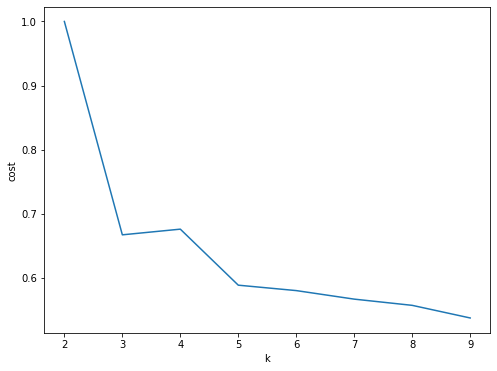

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler
# Loads data.
df_8 = df_opt1.select(['IncidntNum','X','Y'])
#Prepare features
FEATURES_COL = ['X', 'Y']
for col in df_8.columns:
    if col in FEATURES_COL:
        df_8 = df_8.withColumn(col,df_8[col].cast('float'))
vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans = vecAssembler.transform(df_8).select('IncidntNum', 'features')

#Optimize choice of k
cost = np.zeros(10)
for k in range(2,10):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = kmeans.fit(df_kmeans.sample(False,0.1, seed=42))
    predictions = model.transform(df_kmeans)
    evaluator = ClusteringEvaluator()
    cost[k] = evaluator.evaluate(predictions)
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),cost[2:10])
ax.set_xlabel('k')
ax.set_ylabel('cost')
display()